In [ ]:
i = 1
while True:
    print(f'Round: {i}')
    #if i!=1:
    %run  main.py play --agents qtable_agent no_movement_agent --train 1 --n-rounds 100 --scenario loot-crate --no-gui
    %run  main.py play --agents qtable_agent peaceful_agent --train 1 --n-rounds 100 --scenario loot-crate --no-gui
    %run  main.py play --agents qtable_agent rule_based_agent --train 1 --n-rounds 100 --scenario loot-crate --no-gui


    i+=1

In [48]:
from time import sleep

i = 1
EPS_start = 0.5
EPS_DECAY = 0.99
EPS_END = 0.001
EPS = EPS_start
while True:
    
    #%run  main.py play --agents qtable_agent --train 1 --n-rounds 10 --scenario coin-heaven --no-gui --save-stat
    %run  main.py play --agents qtable_agent no_movement_agent --train 1 --n-rounds 100 --scenario empty --no-gui --save-stats
    if EPS > EPS_END:
        EPS = EPS * EPS_DECAY**10
        change_eps(number=EPS)
    #sleep(1)
    if i==1: break
    i += 1

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:30<00:00,  3.23it/s]


[1.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.3, 0.0, 0.5, 0.5, 0.5, 0.4, 0.5, 0.0, 0.0, 0.4, 0.0, 0.0, 0.35, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.0, 0.0, 0.65, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.3, 0.0, 0.45, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.5, 0.35, 0.0, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.15, 0.0, 0.0, 0.5, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.65, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.45, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0, 0.6, 1.0, 0.5, 0.0, 0.0, 0.5, 1.0, 0.0, 0.0, 0.3, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0]


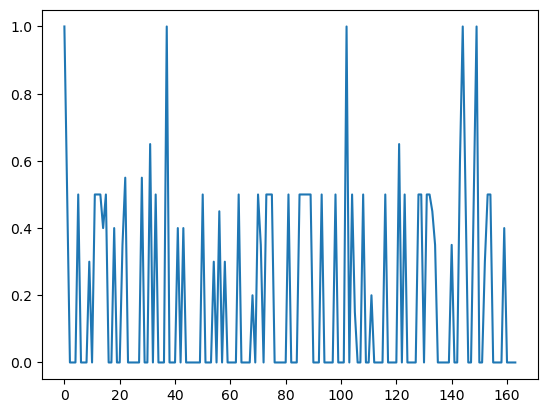

In [49]:
import os
import json
from matplotlib import pyplot as plt

PATH = 'results'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
files = [file for file in os.listdir(target_folder) if file.endswith('.json')]
plot_keys = ['bombs', 'coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'time']
scores = []
for file in files:
    #print(file)
    file_path = '/'.join((target_folder,file))
    with open(file_path)as f:
        data = json.load(f)
    #print(data)
    agents = data['by_agent']
    agent = agents['qtable_agent']
    score = agent['score']/agent['rounds']
    scores.append(score)
print(scores)
plt.plot(scores)

[4]


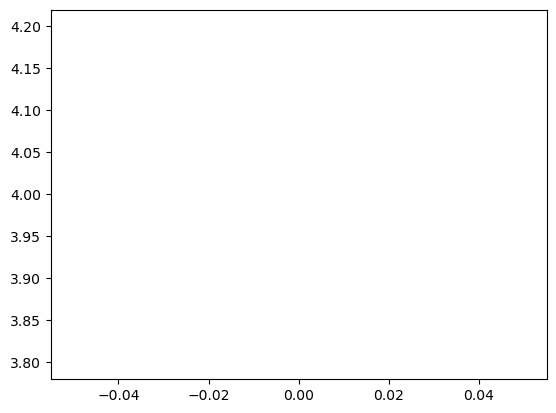

In [16]:
import os
import json
import pickle
from matplotlib import pyplot as plt

PATH = 'agent_code/qtable_agent/stats'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
files = [file for file in os.listdir(target_folder) if file.endswith('.pkl')]
plot_keys = ['bombs', 'coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'time']
scores = []
for file in files:
    #print(file)
    file_path = '/'.join((target_folder,file))
    with open(file_path, "rb")as f:
        stats = pickle.load(f)
    scores += stats.round_score_history
print(scores)
plt.plot(scores)

In [29]:
def change_eps(number=0.3):
    PATH = 'agent_code/qtable_agent/'
    here = os.getcwd().replace('\\','/')
    target_folder = '/'.join((here,PATH))
    file = '/globals.py'
    with open(target_folder+file, 'r')as f:
        string = f.read().split('\n')
        #print(string)
        for i, s in enumerate(string):
            if 'EPS_START' in s:
                s_new = '= '.join((s.split('=')[0],str(number)))
                string[i] = s_new

    with open(target_folder+file, 'w') as n:
        n.write('\n'.join(string))

change_eps(number=0.7)

In [ ]:
agents = data['by_agent']

def performance_plot(agents):
    # TODO : maybe we also want the number of wins
    plot_keys = ['bombs', 'coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'time']
    fig, axs = plt.subplots(len(plot_keys), sharex=True, figsize=(10,10), layout="constrained")
    fig.suptitle('Statistics',size=13)
    axs = axs.flatten()
    for key, ax in zip(plot_keys, axs):
        ax.set_title(key)
        ax.set_ylabel('score')
        try: 
            for agent_name in agents.keys():
                agent = agents[agent_name]
                stat = agent[key]
                p = ax.bar(agent_name, stat, label=str(stat))
                ax.bar_label(p, label_type="center")
        except:
            continue
    plt.xticks(rotation=45)

performance_plot(agents)

            
